In [1]:
# Import the "predator and prey" library, written by Lu
import pnp

# Import relevant plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import data libraries
import pandas as pd

In [2]:
# Defining the model
model = pnp.LotkaVolterra()
model.population['rabbit'] = 2
model.simulation_parameters['step_size'] = 10**-2
model.simulation_parameters['steps'] = 10**6
model.simulation_parameters['compression'] = 10**1

In [3]:
# Euler's Method (default)
seperate_df_Euler, combined_df_Euler = model.run_simulation()
print(seperate_df_Euler.tail())

100%|██████████| 1000000/1000000 [00:02<00:00, 382644.70it/s]
           time    rabbit      wolf
99996    9999.6  0.411802  1.112750
99997    9999.7  0.408369  1.048781
99998    9999.8  0.407501  0.988291
99999    9999.9  0.409037  0.931332
100000  10000.0  0.412857  0.877904


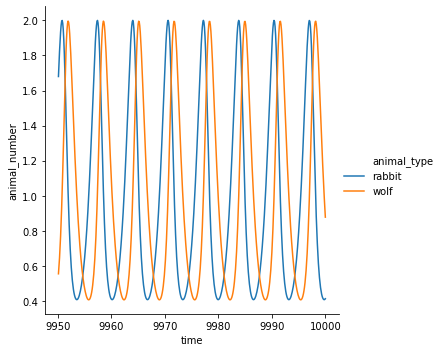

In [4]:
# Plotting the last 1000 entries where the difference should be the most obvious
sns.relplot(x="time", y="animal_number", hue="animal_type", kind='line', data=combined_df_Euler.tail(10**3)) # Plotting

In [5]:
# Ralston Method
model.method = 'Ralston'
seperate_df_Ralston, combined_df_Ralston = model.run_simulation()
print(seperate_df_Ralston.tail())

100%|██████████| 1000000/1000000 [00:05<00:00, 190515.40it/s]
           time    rabbit      wolf
99996    9999.6  1.471719  1.821902
99997    9999.7  1.350201  1.898341
99998    9999.8  1.230529  1.954206
99999    9999.9  1.116428  1.988284
100000  10000.0  1.010558  2.000792


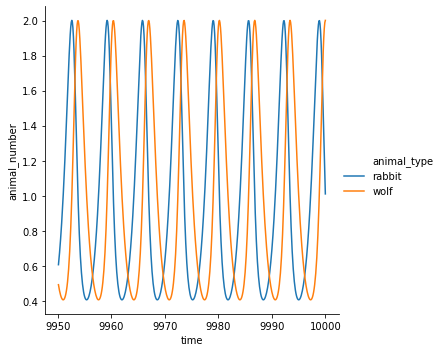

In [6]:
# Plotting the last 1000 entries where the difference should be the most obvious

# It is visible that the Ralston Method is out of phase with the Euler Method
sns.relplot(x="time", y="animal_number", hue="animal_type", kind='line', data=combined_df_Ralston.tail(10**3)) # Plotting

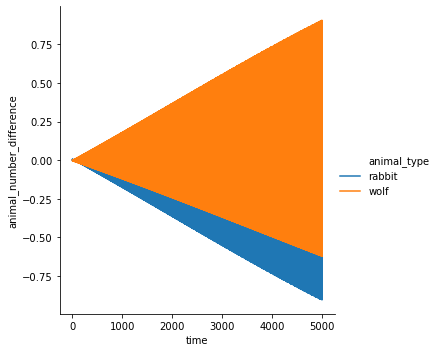

In [7]:
seperate_df_Difference = seperate_df_Euler.subtract(seperate_df_Ralston)

# Computing the difference
combined_df_Difference = combined_df_Euler.copy()
combined_df_Difference['animal_number_difference'] = combined_df_Euler['animal_number'].subtract(combined_df_Ralston['animal_number'])

# Plotting the first 10**5 steps
sns.relplot(x="time", y="animal_number_difference", hue="animal_type", kind='line', data=combined_df_Difference.head(10**5))  

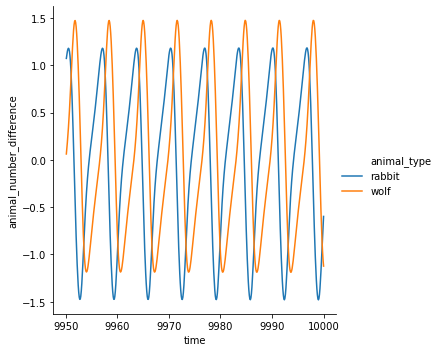

In [8]:
# Plotting the last 10**3 steps
sns.relplot(x="time", y="animal_number_difference", hue="animal_type", kind='line', data=combined_df_Difference.tail(10**3))
# As is visible, the difference has begun oscillating itself, showing that although the Euler method is inaccurate compared to the Ralston Method, it does not overshoot further
# This means that if possible the Ralston Method should be used but for purely qualitative analysis, independent on time (like in phase space), the Euler Method suffices